![logo](udinus.png)

**<center> UJIAN AKHIR SEMESTER GANJIL 2022/2023 <br> ANALITIKA MEDIA SOSIAL </center>**

**<center>ANALISIS SENTIMEN PADA CHANNEL OTODRIVER TERHADAP PRODUK HYUNDAI IONIQ 5 DENGAN METODE TD-IDF DAN LDA</center>**

<center>NAMA : DUTA FIRDAUS WICAKSONO | NIM : A12.2020.06480</center>

**<center>PROGRAM STUDI SISTEM INFORMASI <br> FAKULTAS ILMU KOMPUTER <br> UNIVERSITAS DIAN NUSWANTORO</center>**

1. SENTIMENT ANALYSIS (TF-IDF)
2. TOPIC MODELLING (LDA)

3. DATASET : Dataset_Sentimen2.csv
4. SUMBER DATASET : KOMENTAR PADA VIDEO YOUTUBE (https://www.youtube.com/watch?v=WGI2the5FCc)

**LIBRARY EKPHRASIS**

In [1]:
from ekphrasis.classes.preprocessor import TextPreProcessor
from ekphrasis.classes.tokenizer import SocialTokenizer
from ekphrasis.dicts.emoticons import emoticons

text_processor = TextPreProcessor(
    # terms that will be normalized
    normalize=['email', 'percent', 'money', 'phone', 'user',
        'time', 'date', 'number'],
    # terms that will be annotated
    #annotate={"hashtag", "allcaps", "elongated", "repeated",'emphasis', 'censored'},
    annotate={"hashtag","allcaps","elongated","repeated",'emphasis','censored'},
    fix_html=True,  # fix HTML tokens
    
    # corpus from which the word statistics are going to be used 
    # for word segmentation 
    segmenter="twitter", 
    
    # corpus from which the word statistics are going to be used 
    # for spell correction
    corrector="twitter", 
    
    unpack_hashtags=True,  # perform word segmentation on hashtags
    unpack_contractions=True,  # Unpack contractions (can't -> can not)
    spell_correct_elong=False,  # spell correction for elongated words
    
    # select a tokenizer. You can use SocialTokenizer, or pass your own
    # the tokenizer, should take as input a string and return a list of tokens
    tokenizer=SocialTokenizer(lowercase=True).tokenize,
    
    # list of dictionaries, for replacing tokens extracted from the text,
    # with other expressions. You can pass more than one dictionaries.
    dicts=[emoticons]
)

E:\anaconda3\lib\site-packages\ekphrasis\classes\tokenizer.py:225: FutureWarning: Possible nested set at position 2190
  self.tok = re.compile(r"({})".format("|".join(pipeline)))


Reading twitter - 1grams ...
Reading twitter - 2grams ...
Reading twitter - 1grams ...


E:\anaconda3\lib\site-packages\ekphrasis\classes\exmanager.py:14: FutureWarning: Possible nested set at position 42
  regexes = {k.lower(): re.compile(self.expressions[k]) for k, v in


**LOAD LIBRARY**

In [2]:
import re
import string 
import pandas as pd
from copy import deepcopy

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

**LOAD DATASET**

In [3]:
df = pd.read_csv('Dataset_Sentimen2.csv')

In [4]:
df.head(10)

,publishedAt,authorDisplayName,textDisplay,likeCount,sentimen
0,2022-12-30T17:50:30Z,Nico Sanam,Sebentar lagi saya mendapatkan y,0.0,1.0
1,2022-12-28T13:55:41Z,browns,bismillah mudah2an undian poin indosat dpt had...,0.0,1.0
2,2022-12-28T05:30:18Z,Plankton,TAU MINECRAFT :V,0.0,1.0
3,2022-12-26T05:19:39Z,Fang Yin,Mau Tanya Mas. Ada ga mobil listrik yg bisa ng...,0.0,0.0
4,2022-12-26T04:11:19Z,Kaonashi's Gold,bisa ga ya Head unit Stargazer di upgrade ke h...,0.0,0.0
5,2022-12-21T07:31:57Z,CALON PEMENANG,berapa tahun sekali ganti baterai ? dan brp ha...,0.0,0.0
6,2022-12-13T10:35:03Z,cch33tah,Ada garansi batere? Brp harga battery replacem...,0.0,0.0
7,2022-12-11T21:37:58Z,GARASI MOBIL CLASSIC (GMC),Itu mobil listri.. terus tiang listrik nya dim...,0.0,-1.0
8,2022-12-11T03:55:19Z,Adi Satwika,Seandai ya mobil ESMK sperti ini di kembangkan...,1.0,1.0
9,2022-12-11T00:00:57Z,Keponakan Luhur,mobil idaman banget ini,0.0,1.0


Label yang akan digunakan adalah label sentimen, karena fokus pada anlisis sentimen

In [5]:
df = df.drop(['likeCount'], axis=1)

In [6]:
df

,publishedAt,authorDisplayName,textDisplay,sentimen
0,2022-12-30T17:50:30Z,Nico Sanam,Sebentar lagi saya mendapatkan y,1.0
1,2022-12-28T13:55:41Z,browns,bismillah mudah2an undian poin indosat dpt had...,1.0
2,2022-12-28T05:30:18Z,Plankton,TAU MINECRAFT :V,1.0
3,2022-12-26T05:19:39Z,Fang Yin,Mau Tanya Mas. Ada ga mobil listrik yg bisa ng...,0.0
4,2022-12-26T04:11:19Z,Kaonashi's Gold,bisa ga ya Head unit Stargazer di upgrade ke h...,0.0
...,...,...,...,...
112,2022-09-06T23:09:28Z,Dedy Winarta,Kualitas cat nya gimana om? Besok jangan lupa ...,-1.0
113,2022-09-06T00:28:41Z,Kurnia Wati,Bang benarkah mobil ini cat nya terkelupas bil...,-1.0
114,2022-09-05T08:27:38Z,Donny Keang,Ini sdh bisa di pakai di luar jawa ya om fitra?,0.0
115,2022-09-04T04:18:01Z,PAPA BAGUS,Speed likmiter gak dibahas bang,0.0


In [7]:
df = df.drop(['publishedAt'], axis=1)

In [8]:
df

,authorDisplayName,textDisplay,sentimen
0,Nico Sanam,Sebentar lagi saya mendapatkan y,1.0
1,browns,bismillah mudah2an undian poin indosat dpt had...,1.0
2,Plankton,TAU MINECRAFT :V,1.0
3,Fang Yin,Mau Tanya Mas. Ada ga mobil listrik yg bisa ng...,0.0
4,Kaonashi's Gold,bisa ga ya Head unit Stargazer di upgrade ke h...,0.0
...,...,...,...
112,Dedy Winarta,Kualitas cat nya gimana om? Besok jangan lupa ...,-1.0
113,Kurnia Wati,Bang benarkah mobil ini cat nya terkelupas bil...,-1.0
114,Donny Keang,Ini sdh bisa di pakai di luar jawa ya om fitra?,0.0
115,PAPA BAGUS,Speed likmiter gak dibahas bang,0.0


In [9]:
df = df.drop(['authorDisplayName'], axis=1)

In [10]:
df

,textDisplay,sentimen
0,Sebentar lagi saya mendapatkan y,1.0
1,bismillah mudah2an undian poin indosat dpt had...,1.0
2,TAU MINECRAFT :V,1.0
3,Mau Tanya Mas. Ada ga mobil listrik yg bisa ng...,0.0
4,bisa ga ya Head unit Stargazer di upgrade ke h...,0.0
...,...,...
112,Kualitas cat nya gimana om? Besok jangan lupa ...,-1.0
113,Bang benarkah mobil ini cat nya terkelupas bil...,-1.0
114,Ini sdh bisa di pakai di luar jawa ya om fitra?,0.0
115,Speed likmiter gak dibahas bang,0.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   textDisplay  113 non-null    object 
 1   sentimen     113 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.0+ KB


**PREPROCESSING**

In [12]:
def bersih_data(text):
    return " ".join(text_processor.pre_process_doc (text))

def non_ascii(text):
    return text.encode('ascii', 'replace').decode('ascii')

def remove_space_alzami(text):
    return " ".join(text.split())

def remove_emoji_alzami(text):
    return ' '.join(re.sub("([x#][A-Za-z0-9]+)"," ", str(text)).split())

def remove_tab(text):
    return text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")

def remove_tab2(text):
    return re.sub('\s+',' ', str(text))

def remove_rt(text):
    return text.replace('RT'," ")

def remove_mention(text):
    return ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", str(text)).split())

def remove_incomplete_url(text):
    return text.replace("http://", " ").replace("https://", " ")

def remove_single_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", str(text))

def change_stripe(text):
    return text.replace('-'," ")

def lower(text):
    return text.lower()

def remove_punctuation(text):
    remove = string.punctuation
    remove = remove.replace("_", "") # don't remove hyphens
    pattern = r"[{}]".format(remove) # create the pattern
    return re.sub(pattern, "", str(text)) 

**RUNNING PREPROCESSING**

In [13]:
final_string = []
for text in df['textDisplay'].values:
    EachReviewText = ""
    proc = bersih_data (str(text))
    proc = remove_rt(proc) 
    proc = lower(proc)
    proc = change_stripe(proc)
    proc = remove_tab(proc)
    proc = remove_tab2(proc)
    proc = non_ascii(proc)
    proc = remove_incomplete_url(proc)
    proc = remove_single_char(proc)
    proc = remove_punctuation(proc)
    proc = remove_space_alzami(proc)
    EachReviewText = proc
    final_string.append(EachReviewText)

MEMBUAT KOLOM [step01]

In [14]:
df["step01"] = final_string

In [15]:
df.head(1)

,textDisplay,sentimen,step01
0,Sebentar lagi saya mendapatkan y,1.0,sebentar lagi saya mendapatkan


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   textDisplay  113 non-null    object 
 1   sentimen     113 non-null    float64
 2   step01       117 non-null    object 
dtypes: float64(1), object(2)
memory usage: 2.9+ KB


**MENGHAPUS RECORD KOSONG**

In [17]:
df_hapus = df[~df['step01'].str.contains(" ")]

In [18]:
df_new = df[~df.isin(df_hapus)].dropna()

In [19]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111 entries, 0 to 116
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   textDisplay  111 non-null    object 
 1   sentimen     111 non-null    float64
 2   step01       111 non-null    object 
dtypes: float64(1), object(2)
memory usage: 3.5+ KB


**NORMALISASI KATA SLANG**

In [20]:
# token
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize 

[nltk_data] Downloading package punkt to C:\Users\HP
[nltk_data]     ELITEBOOK\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [21]:
def word_tokenize_wrapper(text):
  return word_tokenize(text)

In [22]:
df_new['tokens'] = df['step01'].apply(word_tokenize_wrapper)

In [23]:
df_new.head(15)

,textDisplay,sentimen,step01,tokens
0,Sebentar lagi saya mendapatkan y,1.0,sebentar lagi saya mendapatkan,"[sebentar, lagi, saya, mendapatkan]"
1,bismillah mudah2an undian poin indosat dpt had...,1.0,bismillah mudah2an undian poin indosat dpt had...,"[bismillah, mudah2an, undian, poin, indosat, d..."
2,TAU MINECRAFT :V,1.0,allcaps tau minecraft allcaps,"[allcaps, tau, minecraft, allcaps]"
3,Mau Tanya Mas. Ada ga mobil listrik yg bisa ng...,0.0,mau tanya mas ada ga mobil listrik yg bisa nge...,"[mau, tanya, mas, ada, ga, mobil, listrik, yg,..."
4,bisa ga ya Head unit Stargazer di upgrade ke h...,0.0,bisa ga ya head unit stargazer di upgrade ke h...,"[bisa, ga, ya, head, unit, stargazer, di, upgr..."
5,berapa tahun sekali ganti baterai ? dan brp ha...,0.0,berapa tahun sekali ganti baterai dan brp harg...,"[berapa, tahun, sekali, ganti, baterai, dan, b..."
6,Ada garansi batere? Brp harga battery replacem...,0.0,ada garansi batere brp harga battery replaceme...,"[ada, garansi, batere, brp, harga, battery, re..."
7,Itu mobil listri.. terus tiang listrik nya dim...,-1.0,itu mobil listri repeated terus tiang listrik ...,"[itu, mobil, listri, repeated, terus, tiang, l..."
8,Seandai ya mobil ESMK sperti ini di kembangkan...,1.0,seandai ya mobil allcaps esmk allcaps sperti i...,"[seandai, ya, mobil, allcaps, esmk, allcaps, s..."
9,mobil idaman banget ini,1.0,mobil idaman banget ini,"[mobil, idaman, banget, ini]"


In [24]:
normalized_word = pd.read_excel("kamus_clean.xlsx")

normalized_word_dict = {}

for index, row in normalized_word.iterrows():
    if row[0] not in normalized_word_dict:
        normalized_word_dict[row[0]] = row[1] 

def normalized_term(document):
    return [normalized_word_dict[term] if term in normalized_word_dict else term for term in document]

df_new['tokens_perbaikan'] = df_new['tokens'].apply(normalized_term)

In [25]:
df_new.head()

,textDisplay,sentimen,step01,tokens,tokens_perbaikan
0,Sebentar lagi saya mendapatkan y,1.0,sebentar lagi saya mendapatkan,"[sebentar, lagi, saya, mendapatkan]","[sebentar, lagi, saya, mendapatkan]"
1,bismillah mudah2an undian poin indosat dpt had...,1.0,bismillah mudah2an undian poin indosat dpt had...,"[bismillah, mudah2an, undian, poin, indosat, d...","[bismillah, mudah2an, undian, poin, indosat, d..."
2,TAU MINECRAFT :V,1.0,allcaps tau minecraft allcaps,"[allcaps, tau, minecraft, allcaps]","[allcaps, tau, minecraft, allcaps]"
3,Mau Tanya Mas. Ada ga mobil listrik yg bisa ng...,0.0,mau tanya mas ada ga mobil listrik yg bisa nge...,"[mau, tanya, mas, ada, ga, mobil, listrik, yg,...","[mau, tanya, mas, ada, tidak, mobil, listrik, ..."
4,bisa ga ya Head unit Stargazer di upgrade ke h...,0.0,bisa ga ya head unit stargazer di upgrade ke h...,"[bisa, ga, ya, head, unit, stargazer, di, upgr...","[bisa, tidak, iya, head, unit, stargazer, di, ..."


In [26]:
df_new.iloc[1].tokens

['bismillah',
 'mudah2an',
 'undian',
 'poin',
 'indosat',
 'dpt',
 'hadiah',
 'mobil',
 'ini',
 'klo',
 'dapat',
 'mau',
 'saya',
 'jual',
 'buat',
 'bikin',
 'kontrakan',
 'aamiin']

In [27]:
df_new.iloc[1].tokens_perbaikan

['bismillah',
 'mudah2an',
 'undian',
 'poin',
 'indosat',
 'dapat ',
 'hadiah',
 'mobil',
 'ini',
 'kalau',
 'dapat',
 'mau',
 'saya',
 'jual',
 'buat',
 'membuat',
 'kontrakan',
 'semoga']

**STOPWORD - MODUL NLTK**

In [28]:
from nltk.corpus import stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to C:\Users\HP
[nltk_data]     ELITEBOOK\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [29]:
stopword = nltk.corpus.stopwords.words('indonesian')

def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text

df_new['Stop_removal'] = df_new['tokens_perbaikan'].apply(lambda x : remove_stopwords(x))
df_new

,textDisplay,sentimen,step01,tokens,tokens_perbaikan,Stop_removal
0,Sebentar lagi saya mendapatkan y,1.0,sebentar lagi saya mendapatkan,"[sebentar, lagi, saya, mendapatkan]","[sebentar, lagi, saya, mendapatkan]",[sebentar]
1,bismillah mudah2an undian poin indosat dpt had...,1.0,bismillah mudah2an undian poin indosat dpt had...,"[bismillah, mudah2an, undian, poin, indosat, d...","[bismillah, mudah2an, undian, poin, indosat, d...","[bismillah, mudah2an, undian, poin, indosat, d..."
2,TAU MINECRAFT :V,1.0,allcaps tau minecraft allcaps,"[allcaps, tau, minecraft, allcaps]","[allcaps, tau, minecraft, allcaps]","[allcaps, tau, minecraft, allcaps]"
3,Mau Tanya Mas. Ada ga mobil listrik yg bisa ng...,0.0,mau tanya mas ada ga mobil listrik yg bisa nge...,"[mau, tanya, mas, ada, ga, mobil, listrik, yg,...","[mau, tanya, mas, ada, tidak, mobil, listrik, ...","[mas, mobil, listrik, ngecas, ngecas, rumah, s..."
4,bisa ga ya Head unit Stargazer di upgrade ke h...,0.0,bisa ga ya head unit stargazer di upgrade ke h...,"[bisa, ga, ya, head, unit, stargazer, di, upgr...","[bisa, tidak, iya, head, unit, stargazer, di, ...","[iya, head, unit, stargazer, upgrade, head, un..."
...,...,...,...,...,...,...
112,Kualitas cat nya gimana om? Besok jangan lupa ...,-1.0,kualitas cat nya gimana om besok jangan lupa b...,"[kualitas, cat, nya, gimana, om, besok, jangan...","[kualitas, cat, nya, bagaimana, om, besok, jan...","[kualitas, cat, nya, om, besok, lupa, bawa, la..."
113,Bang benarkah mobil ini cat nya terkelupas bil...,-1.0,bang benarkah mobil ini cat nya terkelupas bil...,"[bang, benarkah, mobil, ini, cat, nya, terkelu...","[bang, benarkah, mobil, ini, cat, nya, terkelu...","[bang, mobil, cat, nya, terkelupas, kenakan, l..."
114,Ini sdh bisa di pakai di luar jawa ya om fitra?,0.0,ini sdh bisa di pakai di luar jawa ya om fitra,"[ini, sdh, bisa, di, pakai, di, luar, jawa, ya...","[ini, sudah, bisa, di, pakai, di, luar, jawa, ...","[pakai, jawa, iya, om, fitra]"
115,Speed likmiter gak dibahas bang,0.0,speed likmiter gak dibahas bang,"[speed, likmiter, gak, dibahas, bang]","[speed, likmiter, tidak, dibahas, bang]","[speed, likmiter, dibahas, bang]"


In [30]:
df_new.iloc[1].tokens_perbaikan

['bismillah',
 'mudah2an',
 'undian',
 'poin',
 'indosat',
 'dapat ',
 'hadiah',
 'mobil',
 'ini',
 'kalau',
 'dapat',
 'mau',
 'saya',
 'jual',
 'buat',
 'membuat',
 'kontrakan',
 'semoga']

In [31]:
df_new.iloc[1].Stop_removal

['bismillah',
 'mudah2an',
 'undian',
 'poin',
 'indosat',
 'dapat ',
 'hadiah',
 'mobil',
 'jual',
 'kontrakan',
 'semoga']

In [32]:
i=0
final_string_tokens = []
for text in df_new['Stop_removal'].values:
    EachReviewText = ""
    EachReviewText = ' '.join(text)
    final_string_tokens.append(EachReviewText)

In [33]:
df_new["step02"] = final_string_tokens

In [34]:
df_new.head()

,textDisplay,sentimen,step01,tokens,tokens_perbaikan,Stop_removal,step02
0,Sebentar lagi saya mendapatkan y,1.0,sebentar lagi saya mendapatkan,"[sebentar, lagi, saya, mendapatkan]","[sebentar, lagi, saya, mendapatkan]",[sebentar],sebentar
1,bismillah mudah2an undian poin indosat dpt had...,1.0,bismillah mudah2an undian poin indosat dpt had...,"[bismillah, mudah2an, undian, poin, indosat, d...","[bismillah, mudah2an, undian, poin, indosat, d...","[bismillah, mudah2an, undian, poin, indosat, d...",bismillah mudah2an undian poin indosat dapat ...
2,TAU MINECRAFT :V,1.0,allcaps tau minecraft allcaps,"[allcaps, tau, minecraft, allcaps]","[allcaps, tau, minecraft, allcaps]","[allcaps, tau, minecraft, allcaps]",allcaps tau minecraft allcaps
3,Mau Tanya Mas. Ada ga mobil listrik yg bisa ng...,0.0,mau tanya mas ada ga mobil listrik yg bisa nge...,"[mau, tanya, mas, ada, ga, mobil, listrik, yg,...","[mau, tanya, mas, ada, tidak, mobil, listrik, ...","[mas, mobil, listrik, ngecas, ngecas, rumah, s...",mas mobil listrik ngecas ngecas rumah shell pu...
4,bisa ga ya Head unit Stargazer di upgrade ke h...,0.0,bisa ga ya head unit stargazer di upgrade ke h...,"[bisa, ga, ya, head, unit, stargazer, di, upgr...","[bisa, tidak, iya, head, unit, stargazer, di, ...","[iya, head, unit, stargazer, upgrade, head, un...",iya head unit stargazer upgrade head unit ioniq5


**STEMMING - SASTRAWI**

In [35]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [36]:
final_string = []
s = ""
for sentence in df_new["step02"].values:
    filteredSentence = []
    EachReviewText = ""
    s = (stemmer.stem(sentence))
    filteredSentence.append(s)
    
    EachReviewText = ' '.join(filteredSentence)
    final_string.append(EachReviewText)

In [37]:
df_new["ProcessedText"] = final_string

In [38]:
df_new.head(10)

,textDisplay,sentimen,step01,tokens,tokens_perbaikan,Stop_removal,step02,ProcessedText
0,Sebentar lagi saya mendapatkan y,1.0,sebentar lagi saya mendapatkan,"[sebentar, lagi, saya, mendapatkan]","[sebentar, lagi, saya, mendapatkan]",[sebentar],sebentar,sebentar
1,bismillah mudah2an undian poin indosat dpt had...,1.0,bismillah mudah2an undian poin indosat dpt had...,"[bismillah, mudah2an, undian, poin, indosat, d...","[bismillah, mudah2an, undian, poin, indosat, d...","[bismillah, mudah2an, undian, poin, indosat, d...",bismillah mudah2an undian poin indosat dapat ...,bismillah mudah2an undi poin indosat dapat had...
2,TAU MINECRAFT :V,1.0,allcaps tau minecraft allcaps,"[allcaps, tau, minecraft, allcaps]","[allcaps, tau, minecraft, allcaps]","[allcaps, tau, minecraft, allcaps]",allcaps tau minecraft allcaps,allcaps tau minecraft allcaps
3,Mau Tanya Mas. Ada ga mobil listrik yg bisa ng...,0.0,mau tanya mas ada ga mobil listrik yg bisa nge...,"[mau, tanya, mas, ada, ga, mobil, listrik, yg,...","[mau, tanya, mas, ada, tidak, mobil, listrik, ...","[mas, mobil, listrik, ngecas, ngecas, rumah, s...",mas mobil listrik ngecas ngecas rumah shell pu...,mas mobil listrik ngecas ngecas rumah shell pu...
4,bisa ga ya Head unit Stargazer di upgrade ke h...,0.0,bisa ga ya head unit stargazer di upgrade ke h...,"[bisa, ga, ya, head, unit, stargazer, di, upgr...","[bisa, tidak, iya, head, unit, stargazer, di, ...","[iya, head, unit, stargazer, upgrade, head, un...",iya head unit stargazer upgrade head unit ioniq5,iya head unit stargazer upgrade head unit ioniq5
5,berapa tahun sekali ganti baterai ? dan brp ha...,0.0,berapa tahun sekali ganti baterai dan brp harg...,"[berapa, tahun, sekali, ganti, baterai, dan, b...","[berapa, tahun, sekali, ganti, baterai, dan, b...","[ganti, baterai, brp, harganya]",ganti baterai brp harganya,ganti baterai brp harga
6,Ada garansi batere? Brp harga battery replacem...,0.0,ada garansi batere brp harga battery replaceme...,"[ada, garansi, batere, brp, harga, battery, re...","[ada, garansi, batere, brp, harga, battery, re...","[garansi, batere, brp, harga, battery, replace...",garansi batere brp harga battery replacement p...,garansi batere brp harga battery replacement p...
7,Itu mobil listri.. terus tiang listrik nya dim...,-1.0,itu mobil listri repeated terus tiang listrik ...,"[itu, mobil, listri, repeated, terus, tiang, l...","[itu, mobil, listri, repeated, terus, tiang, l...","[mobil, listri, repeated, tiang, listrik, nya,...",mobil listri repeated tiang listrik nya dimana...,mobil listri repeated tiang listrik nya mana i...
8,Seandai ya mobil ESMK sperti ini di kembangkan...,1.0,seandai ya mobil allcaps esmk allcaps sperti i...,"[seandai, ya, mobil, allcaps, esmk, allcaps, s...","[seandai, iya, mobil, allcaps, esmk, allcaps, ...","[seandai, iya, mobil, allcaps, esmk, allcaps, ...",seandai iya mobil allcaps esmk allcaps sperti ...,anda iya mobil allcaps esmk allcaps sperti kem...
9,mobil idaman banget ini,1.0,mobil idaman banget ini,"[mobil, idaman, banget, ini]","[mobil, idaman, banget, ini]","[mobil, idaman, banget]",mobil idaman banget,mobil idam banget


**SAVE - PREPROCESSING**

In [39]:
df_new.to_csv('clean_dataset_uas_part01.csv', sep=";")

-

**DISTRIBUSI FITUR & LABEL**

In [40]:
import pandas as pd
import numpy as np

In [41]:
dataset = pd.read_csv('clean_dataset_uas_part01.csv', sep=";")

In [42]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        111 non-null    int64  
 1   textDisplay       111 non-null    object 
 2   sentimen          111 non-null    float64
 3   step01            111 non-null    object 
 4   tokens            111 non-null    object 
 5   tokens_perbaikan  111 non-null    object 
 6   Stop_removal      111 non-null    object 
 7   step02            111 non-null    object 
 8   ProcessedText     111 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 7.9+ KB


In [43]:
dataset_feature = dataset['ProcessedText'].astype(str)

In [44]:
dataset_feature.head(10)

0                                             sebentar
1    bismillah mudah2an undi poin indosat dapat had...
2                        allcaps tau minecraft allcaps
3    mas mobil listrik ngecas ngecas rumah shell pu...
4     iya head unit stargazer upgrade head unit ioniq5
5                              ganti baterai brp harga
6    garansi batere brp harga battery replacement p...
7    mobil listri repeated tiang listrik nya mana i...
8    anda iya mobil allcaps esmk allcaps sperti kem...
9                                    mobil idam banget
Name: ProcessedText, dtype: object

In [45]:
dataset_label = dataset['sentimen']

In [46]:
dataset_label.head(10)

0    1.0
1    1.0
2    1.0
3    0.0
4    0.0
5    0.0
6    0.0
7   -1.0
8    1.0
9    1.0
Name: sentimen, dtype: float64

**1. DISTRIBUSI LABEL**

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

E:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


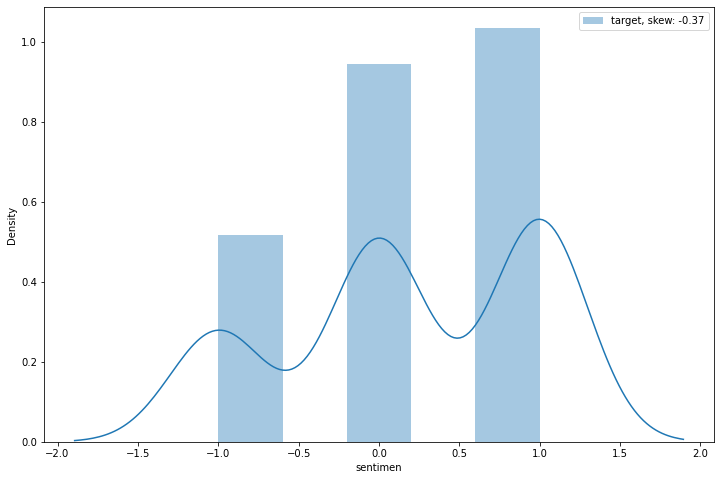

In [48]:
# Visualizing the target variable
plt.figure(figsize=(12,8))
sns.distplot(dataset_label, label=f'target, skew: {dataset_label.skew():.2f}')
plt.legend(loc='best')
plt.show()

In [49]:
dataset_label.value_counts()

 1.0    46
 0.0    42
-1.0    23
Name: sentimen, dtype: int64

**2. EXTRACT FITUR & MACHINE LEARNING**

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split

In [51]:
train_x, test_x, train_label, test_label = train_test_split(dataset_feature, dataset_label, test_size = 0.3, random_state = 42)

In [52]:
test_x

78     dp date update repeated mgkn trima nya number ...
10                      harga dealer daerah jakarta mana
4       iya head unit stargazer upgrade head unit ioniq5
84     user iman maaf om repeated goa nanya orang mod...
64     sungguh mobil br coba bayang panel surya turbi...
68                                      ngisi bartei low
30     user iman br jwb repeated br sbb repeated br j...
45                                        solawatin gaes
96                                          beli new hrv
11                                   delorean versi pahe
79     iya mobil listrik beli kalang tengah atas daya...
80     sadar nonton number menit nikmat jelas om fitr...
0                                               sebentar
81                                   tunggu ioniq number
18                                      rumah 1 5 0 0 om
70     menang undi mobil ioniq number bank niat jual ...
56              bagasi bawa genset just in case low batt
72                             

-

**LOAD TF-IDF**

Term Fequency - Inverse Document Frequency atau disingkat TF - IDF adalah metode algoritma yang berguna untuk menghitung bobot setiap kata yang umum digunakan. Metode ini juga efisien, mudah, serta memiliki hasil yang akurat. 

Metode ini dilakukan dengan cara menghitung nilai Term Frequency (TF) dan Inverse Document Frequency (IDF) pada setiap token atau kata pada dokumen. Sederhananya TF - IDF digunakan agar kita mengetahui seberapa sering suatu kata muncul dalam dokumen. 

**1. POSITIVE**

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [54]:
vectorizer = TfidfVectorizer()

In [55]:
positive_reviews = dataset[(dataset['sentimen'] == 1)]
negative_reviews = dataset[(dataset['sentimen'] == -1)]
neutral_reviews = dataset[(dataset['sentimen'] == 0)]

In [56]:
positive_reviews.head()

,Unnamed: 0,textDisplay,sentimen,step01,tokens,tokens_perbaikan,Stop_removal,step02,ProcessedText
0,0,Sebentar lagi saya mendapatkan y,1.0,sebentar lagi saya mendapatkan,"['sebentar', 'lagi', 'saya', 'mendapatkan']","['sebentar', 'lagi', 'saya', 'mendapatkan']",['sebentar'],sebentar,sebentar
1,1,bismillah mudah2an undian poin indosat dpt had...,1.0,bismillah mudah2an undian poin indosat dpt had...,"['bismillah', 'mudah2an', 'undian', 'poin', 'i...","['bismillah', 'mudah2an', 'undian', 'poin', 'i...","['bismillah', 'mudah2an', 'undian', 'poin', 'i...",bismillah mudah2an undian poin indosat dapat ...,bismillah mudah2an undi poin indosat dapat had...
2,2,TAU MINECRAFT :V,1.0,allcaps tau minecraft allcaps,"['allcaps', 'tau', 'minecraft', 'allcaps']","['allcaps', 'tau', 'minecraft', 'allcaps']","['allcaps', 'tau', 'minecraft', 'allcaps']",allcaps tau minecraft allcaps,allcaps tau minecraft allcaps
8,8,Seandai ya mobil ESMK sperti ini di kembangkan...,1.0,seandai ya mobil allcaps esmk allcaps sperti i...,"['seandai', 'ya', 'mobil', 'allcaps', 'esmk', ...","['seandai', 'iya', 'mobil', 'allcaps', 'esmk',...","['seandai', 'iya', 'mobil', 'allcaps', 'esmk',...",seandai iya mobil allcaps esmk allcaps sperti ...,anda iya mobil allcaps esmk allcaps sperti kem...
9,9,mobil idaman banget ini,1.0,mobil idaman banget ini,"['mobil', 'idaman', 'banget', 'ini']","['mobil', 'idaman', 'banget', 'ini']","['mobil', 'idaman', 'banget']",mobil idaman banget,mobil idam banget


In [57]:
Positive_tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
Positive_tf_idf = Positive_tf_idf_vect.fit_transform(positive_reviews["ProcessedText"].values)

In [58]:
Positive_tf_idf.shape

(46, 438)

In [59]:
features = Positive_tf_idf_vect.get_feature_names()

E:\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [60]:
idfValues = Positive_tf_idf_vect.idf_

In [61]:
d = dict(zip(features, 9 - idfValues))

In [62]:
sortedDict = sorted(d.items(), key = lambda d: d[1], reverse = True)

In [63]:
for i in range(200):
    print(sortedDict[i])

('mobil', 6.983065742346158)
('number', 6.6347590480779415)
('repeated', 6.347076975626161)
('allcaps', 6.095762547345255)
('beli', 6.095762547345255)
('br', 5.941611867517997)
('harga', 5.941611867517997)
('ioniq', 5.941611867517997)
('ioniq number', 5.759290310724042)
('iya', 5.759290310724042)
('listrik', 5.759290310724042)
('om', 5.759290310724042)
('hyundai', 5.5361467594098315)
('indonesia', 5.5361467594098315)
('rumah', 5.5361467594098315)
('banget', 5.248464686958052)
('coba', 5.248464686958052)
('daya', 5.248464686958052)
('elongated', 5.248464686958052)
('fitra', 5.248464686958052)
('iman', 5.248464686958052)
('iya mobil', 5.248464686958052)
('jual', 5.248464686958052)
('kasih', 5.248464686958052)
('kembang', 5.248464686958052)
('keren', 5.248464686958052)
('khusus', 5.248464686958052)
('listrik indonesia', 5.248464686958052)
('menit', 5.248464686958052)
('mobil keren', 5.248464686958052)
('mobil listrik', 5.248464686958052)
('moga', 5.248464686958052)
('niat', 5.248464686958

In [64]:
from wordcloud import WordCloud
import matplotlib.pyplot as plot

In [65]:
def PlotWordCloud(frequency):
    worcloudPlot = WordCloud(background_color="white", width=1500, height=1000)
    worcloudPlot.generate_from_frequencies(frequencies=frequency)
    plot.figure(figsize=(15,10))
    plot.imshow(worcloudPlot, interpolation="bilinear")
    plot.axis("off")
    plot.show()

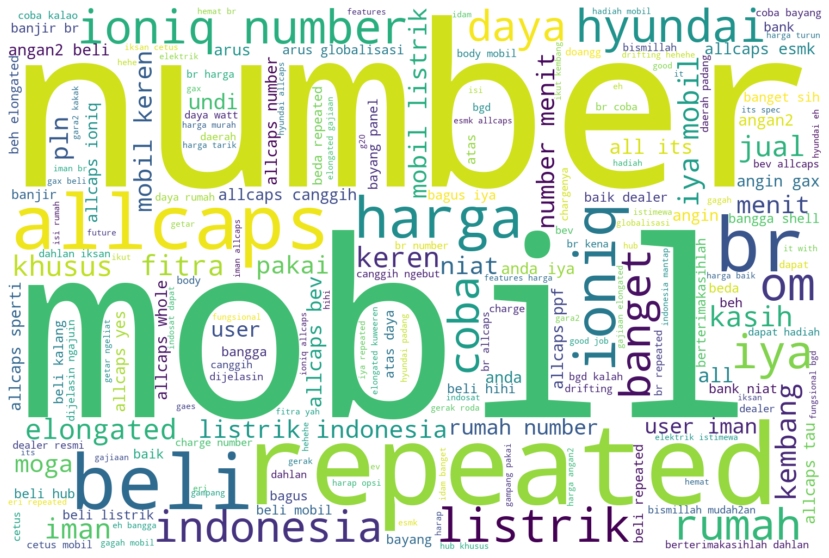

In [66]:
PlotWordCloud(d)

**2. NEGATIVE**

In [67]:
Negative_tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
Negative_tf_idf = Negative_tf_idf_vect.fit_transform(negative_reviews["ProcessedText"].values)

In [68]:
Negative_tf_idf.shape

(23, 389)

In [69]:
features = Negative_tf_idf_vect.get_feature_names()

In [70]:
idfValues = Negative_tf_idf_vect.idf_

In [71]:
d = dict(zip(features, 9 - idfValues))

In [72]:
sortedDict = sorted(d.items(), key = lambda d: d[1], reverse = True)

In [73]:
for i in range(200):
    print(sortedDict[i])

('mobil', 7.306852819440055)
('repeated', 7.306852819440055)
('nya', 6.90138771133189)
('br', 6.767856318707368)
('iya', 6.767856318707368)
('allcaps', 6.613705638880109)
('cat', 6.613705638880109)
('lakban', 6.613705638880109)
('listrik', 6.613705638880109)
('air', 6.431384082086154)
('harga', 6.431384082086154)
('iya repeated', 6.431384082086154)
('user', 6.431384082086154)
('banjir', 6.2082405307719455)
('banjir br', 6.2082405307719455)
('beli', 6.2082405307719455)
('br br', 6.2082405307719455)
('cat nya', 6.2082405307719455)
('cocok', 6.2082405307719455)
('jt', 6.2082405307719455)
('kena', 6.2082405307719455)
('repeated br', 6.2082405307719455)
('air br', 5.920558458320164)
('allcaps air', 5.920558458320164)
('allcaps genang', 5.920558458320164)
('banget', 5.920558458320164)
('bawa', 5.920558458320164)
('bos', 5.920558458320164)
('br allcaps', 5.920558458320164)
('br beli', 5.920558458320164)
('br harga', 5.920558458320164)
('br repeated', 5.920558458320164)
('genang', 5.9205584583

In [74]:
def PlotWordCloud(frequency):
    worcloudPlot = WordCloud(background_color="white", width=1500, height=1000)
    worcloudPlot.generate_from_frequencies(frequencies=frequency)
    plot.figure(figsize=(15,10))
    plot.imshow(worcloudPlot, interpolation="bilinear")
    plot.axis("off")
    plot.show()

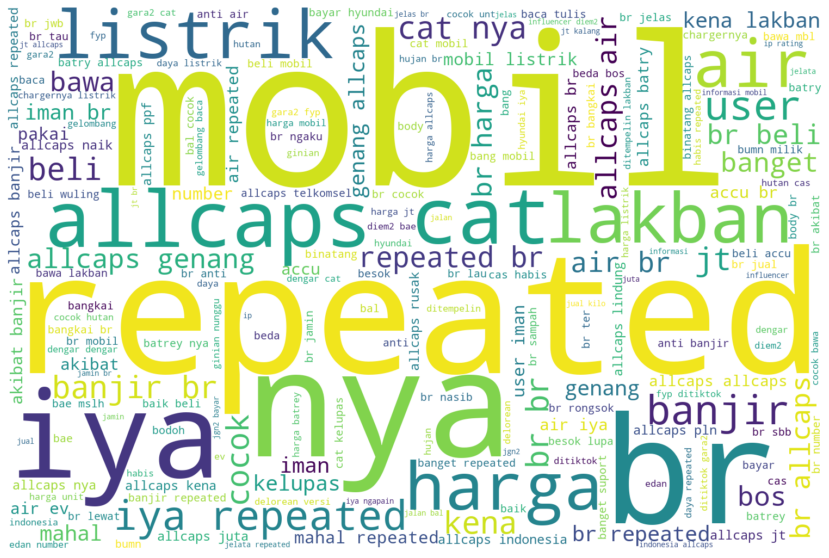

In [75]:
PlotWordCloud(d)

**3. NEUTRAL**

In [76]:
Neutral_tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
Neutral_tf_idf = Neutral_tf_idf_vect.fit_transform(neutral_reviews["ProcessedText"].values)

In [77]:
Neutral_tf_idf.shape

(42, 358)

In [78]:
features = Neutral_tf_idf_vect.get_feature_names()

In [79]:
idfValues = Neutral_tf_idf_vect.idf_

In [80]:
d = dict(zip(features, 9 - idfValues))

In [81]:
sortedDict = sorted(d.items(), key = lambda d: d[1], reverse = True)

In [82]:
for i in range(200):
    print(sortedDict[i])

('nya', 6.636695157104808)
('om', 6.636695157104808)
('mobil', 6.436024461642657)
('harga', 6.318241425986273)
('repeated', 6.318241425986273)
('iya', 6.184710033361751)
('listrik', 6.030559353534493)
('banjir', 5.848237796740538)
('baterai', 5.848237796740538)
('brp', 5.848237796740538)
('fitra', 5.848237796740538)
('mobil listrik', 5.848237796740538)
('bawa', 5.625094245426329)
('brp harga', 5.625094245426329)
('number', 5.625094245426329)
('om fitra', 5.625094245426329)
('pakai', 5.625094245426329)
('allcaps', 5.337412172974547)
('balik', 5.337412172974547)
('balik nya', 5.337412172974547)
('bang', 5.337412172974547)
('banjir makan', 5.337412172974547)
('baterai rusak', 5.337412172974547)
('biaya', 5.337412172974547)
('biaya jangkau', 5.337412172974547)
('cat', 5.337412172974547)
('fitra repeated', 5.337412172974547)
('ganti', 5.337412172974547)
('harga mobil', 5.337412172974547)
('jangkau', 5.337412172974547)
('jangkau balik', 5.337412172974547)
('listrik rendam', 5.337412172974547

In [83]:
def PlotWordCloud(frequency):
    worcloudPlot = WordCloud(background_color="white", width=1500, height=1000)
    worcloudPlot.generate_from_frequencies(frequencies=frequency)
    plot.figure(figsize=(15,10))
    plot.imshow(worcloudPlot, interpolation="bilinear")
    plot.axis("off")
    plot.show()

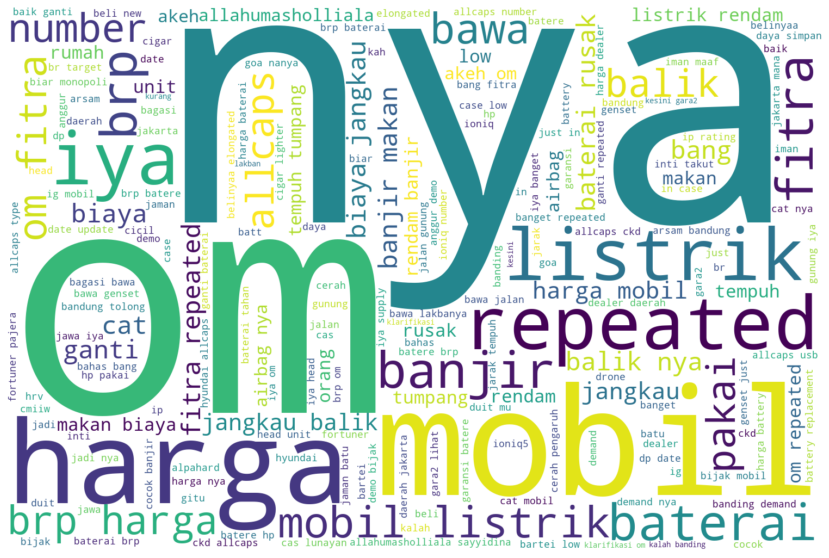

In [84]:
PlotWordCloud(d)

-

**NAIVE BAYES**

In [85]:
from sklearn.naive_bayes import MultinomialNB

In [86]:
from sklearn.pipeline import Pipeline
classifier_nb = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('model', MultinomialNB()),
])

In [87]:
parameters_nb = {
    'tfidf__ngram_range' : [(1, 1), (1, 2), (1, 3), (1, 4)],
    'model__alpha' : (0.0001, 0.001, 0.1, 1, 10, 100)
}

In [88]:
classifier_nb = GridSearchCV(classifier_nb, parameters_nb, cv = 3, n_jobs = -1)

In [89]:
classifier_nb.fit(train_x, train_label.ravel())

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('model', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'model__alpha': (0.0001, 0.001, 0.1, 1, 10, 100),
                         'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3),
                                                (1, 4)]})

In [90]:
y_pred_nb_train = classifier_nb.predict(train_x)
accuracy_nb_train = accuracy_score(train_label, y_pred_nb_train)
print("Accuracy Training Set : ", accuracy_nb_train)

y_pred_nb_test = classifier_nb.predict(test_x)
accuracy_nb_test = accuracy_score(test_label, y_pred_nb_test)
print("Accuracy Test Set : ", accuracy_nb_test)

Accuracy Training Set :  0.974025974025974
Accuracy Test Set :  0.6176470588235294


In [91]:
recall_nb_train = recall_score(train_label, y_pred_nb_train, average='weighted')
print("Recall Training Set : ", recall_nb_train)

recall_nb_test = recall_score(test_label, y_pred_nb_test, average='weighted')
print("Recall Test Set : ", recall_nb_test)

Recall Training Set :  0.974025974025974
Recall Test Set :  0.6176470588235294


In [92]:
precision_nb_train = precision_score(train_label, y_pred_nb_train, average='weighted')
print("Precision Training Set : ", precision_nb_train)

precision_nb_test = precision_score(test_label, y_pred_nb_test, average='weighted')
print("Precision Test Set : ", precision_nb_test)

Precision Training Set :  0.9756001574183393
Precision Test Set :  0.5919117647058824


E:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [93]:
f1_nb_train = f1_score(train_label, y_pred_nb_train, average='weighted')
print("F1 Training Test : ", f1_nb_train)

f1_nb_test = f1_score(test_label, y_pred_nb_test, average='weighted')
print("F1 Test Set : ", f1_nb_test)

F1 Training Test :  0.9737103174603174
F1 Test Set :  0.5764705882352942


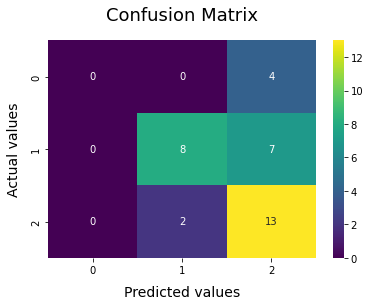

In [94]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(test_label, y_pred_nb_test), annot=True, cmap='viridis', fmt='.0f')
plt.xlabel("Predicted values", fontdict = {'size' : 14}, labelpad = 10)
plt.ylabel("Actual values"   , fontdict = {'size' : 14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size' : 18}, pad = 20)
plt.show()

In [95]:
classifier_nb.best_estimator_

Pipeline(steps=[('tfidf', TfidfVectorizer(ngram_range=(1, 2))),
                ('model', MultinomialNB(alpha=1))])

In [96]:
for param_name in sorted(parameters_nb.keys()):
    print("%s: %r" % (param_name, classifier_nb.best_params_[param_name]))

model__alpha: 1
tfidf__ngram_range: (1, 2)


**VISUALIZATION**

In [97]:
models = [('Naive Bayes Multinomial', accuracy_nb_train, accuracy_nb_test),]

In [98]:
predict = pd.DataFrame(data = models, columns=['Model', 'Training Accuracy', 'Test Accuracy'])
predict

,Model,Training Accuracy,Test Accuracy
0,Naive Bayes Multinomial,0.974026,0.617647


In [99]:
models_comparison = [('Naive Bayes Multinomial', accuracy_nb_test, recall_nb_test, precision_nb_test, f1_nb_test)]

In [100]:
comparison = pd.DataFrame(data = models_comparison, columns=['Model', 'Accuracy', 'Recall', 'Precision', 'F1 Weighted'])
comparison

,Model,Accuracy,Recall,Precision,F1 Weighted
0,Naive Bayes Multinomial,0.617647,0.617647,0.591912,0.576471


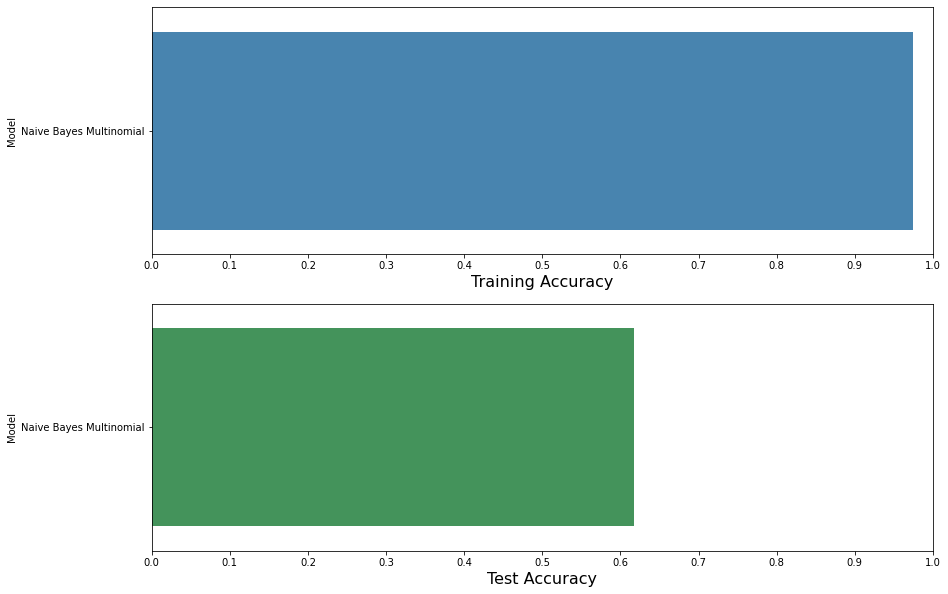

In [101]:
import numpy as pd

f, axes = plt.subplots(2, 1, figsize = (14, 10))

predict.sort_values(by=['Training Accuracy'], ascending=False, inplace=True)

sns.barplot(x='Training Accuracy', y='Model', data = predict, palette='Blues_d', ax = axes[0])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[0].set_xlabel('Training Accuracy', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))

predict.sort_values(by=['Test Accuracy'], ascending=False, inplace=True)

sns.barplot(x='Test Accuracy', y='Model', data = predict, palette='Greens_d', ax = axes[1])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[1].set_xlabel('Test Accuracy', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))

plt.show()

**SAVE TO JOBLIB**

In [102]:
import joblib

In [103]:
# save the model to disk
joblib.dump(classifier_nb.best_estimator_, 'classifier_nb.best_estimator_.sav', compress=1)

['classifier_nb.best_estimator_.sav']

--

**TOPIC MODELLING**

Secara sederhana, Topic Modelling adalah suatu cara mengelompokkan data text berdasarkan suatu topik tertentu. Salah satu tujuannya untuk menemukan pola topik abstrak pada kumpulan dokumen.

Topic Modelling LDA adalah model probabilistik generatif dari koleksi data diskrit seperti corpus text. LDA merupakan model Bayesian hirarki tiga tingkat, yang mana setiap item koleksi dimodelkan sebagai campuran terbatas atas serangkaian set topik. Setiap topik dimodelkan sebagai campuran tak terbatas melalui set yang mendasari probabilitas topik.

LDA menggunakan asumsi bag of words, sehingga urutan kemunculan kata dalam dokumen diabaikan. Asumsi ini diakui tidak realistis, tetapi alasannya karena tujuan LDA hanya untuk menemukan struktur sistematik teks.

**IMPORT LIBRARY**

In [104]:
import pandas as pd

**A. TOKENIZING WITH GENSIM**

In [105]:
df = pd.read_csv('clean_dataset_uas_part01.csv', sep=";")

In [106]:
df.head()

,Unnamed: 0,textDisplay,sentimen,step01,tokens,tokens_perbaikan,Stop_removal,step02,ProcessedText
0,0,Sebentar lagi saya mendapatkan y,1.0,sebentar lagi saya mendapatkan,"['sebentar', 'lagi', 'saya', 'mendapatkan']","['sebentar', 'lagi', 'saya', 'mendapatkan']",['sebentar'],sebentar,sebentar
1,1,bismillah mudah2an undian poin indosat dpt had...,1.0,bismillah mudah2an undian poin indosat dpt had...,"['bismillah', 'mudah2an', 'undian', 'poin', 'i...","['bismillah', 'mudah2an', 'undian', 'poin', 'i...","['bismillah', 'mudah2an', 'undian', 'poin', 'i...",bismillah mudah2an undian poin indosat dapat ...,bismillah mudah2an undi poin indosat dapat had...
2,2,TAU MINECRAFT :V,1.0,allcaps tau minecraft allcaps,"['allcaps', 'tau', 'minecraft', 'allcaps']","['allcaps', 'tau', 'minecraft', 'allcaps']","['allcaps', 'tau', 'minecraft', 'allcaps']",allcaps tau minecraft allcaps,allcaps tau minecraft allcaps
3,3,Mau Tanya Mas. Ada ga mobil listrik yg bisa ng...,0.0,mau tanya mas ada ga mobil listrik yg bisa nge...,"['mau', 'tanya', 'mas', 'ada', 'ga', 'mobil', ...","['mau', 'tanya', 'mas', 'ada', 'tidak', 'mobil...","['mas', 'mobil', 'listrik', 'ngecas', 'ngecas'...",mas mobil listrik ngecas ngecas rumah shell pu...,mas mobil listrik ngecas ngecas rumah shell pu...
4,4,bisa ga ya Head unit Stargazer di upgrade ke h...,0.0,bisa ga ya head unit stargazer di upgrade ke h...,"['bisa', 'ga', 'ya', 'head', 'unit', 'stargaze...","['bisa', 'tidak', 'iya', 'head', 'unit', 'star...","['iya', 'head', 'unit', 'stargazer', 'upgrade'...",iya head unit stargazer upgrade head unit ioniq5,iya head unit stargazer upgrade head unit ioniq5


In [107]:
df['ProcessedText'].loc[0:5]

0                                             sebentar
1    bismillah mudah2an undi poin indosat dapat had...
2                        allcaps tau minecraft allcaps
3    mas mobil listrik ngecas ngecas rumah shell pu...
4     iya head unit stargazer upgrade head unit ioniq5
5                              ganti baterai brp harga
Name: ProcessedText, dtype: object

In [108]:
mask = [isinstance(item, (str, bytes)) for item in df['ProcessedText']]

In [109]:
print(df.loc[mask])

     Unnamed: 0                                        textDisplay  sentimen  \
0             0                   Sebentar lagi saya mendapatkan y       1.0   
1             1  bismillah mudah2an undian poin indosat dpt had...       1.0   
2             2                                   TAU MINECRAFT :V       1.0   
3             3  Mau Tanya Mas. Ada ga mobil listrik yg bisa ng...       0.0   
4             4  bisa ga ya Head unit Stargazer di upgrade ke h...       0.0   
..          ...                                                ...       ...   
106         112  Kualitas cat nya gimana om? Besok jangan lupa ...      -1.0   
107         113  Bang benarkah mobil ini cat nya terkelupas bil...      -1.0   
108         114    Ini sdh bisa di pakai di luar jawa ya om fitra?       0.0   
109         115                    Speed likmiter gak dibahas bang       0.0   
110         116                   Mana Indonesia katanya mau bikin       1.0   

                                       

In [110]:
import gensim
from gensim.utils import simple_preprocess

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=False))

In [111]:
word_tokens = df['ProcessedText'].values.tolist()
word_tokens

['sebentar',
 'bismillah mudah2an undi poin indosat dapat hadiah mobil jual kontra moga',
 'allcaps tau minecraft allcaps',
 'mas mobil listrik ngecas ngecas rumah shell putar roda rem gitu',
 'iya head unit stargazer upgrade head unit ioniq5',
 'ganti baterai brp harga',
 'garansi batere brp harga battery replacement pakai batere brp batere hp pakai number number daya simpan cas lunayan kurang',
 'mobil listri repeated tiang listrik nya mana iya repeated',
 'anda iya mobil allcaps esmk allcaps sperti kembang izin mudah repeated',
 'mobil idam banget',
 'harga dealer daerah jakarta mana',
 'delorean versi pahe',
 'pakai allcaps usb allcaps type cigar lighter kah',
 'teknologi beda bos',
 'om mobil listri bawa jalan gunung iya',
 'baterai rusak iya',
 'ioniq number charge number menit br number teknologi allcaps bev allcaps canggih ngebut chargenya',
 'pakai mobil listrik allcaps pln allcaps naik harga listrik bos',
 'rumah 1 5 0 0 om',
 'sambung',
 'pickup tenaga listrik bang fitra',
 

In [112]:
data_tokens = list(sent_to_words(word_tokens))

In [113]:
data_tokens[0:5]

[['sebentar'],
 ['bismillah',
  'mudah',
  'an',
  'undi',
  'poin',
  'indosat',
  'dapat',
  'hadiah',
  'mobil',
  'jual',
  'kontra',
  'moga'],
 ['allcaps', 'tau', 'minecraft', 'allcaps'],
 ['mas',
  'mobil',
  'listrik',
  'ngecas',
  'ngecas',
  'rumah',
  'shell',
  'putar',
  'roda',
  'rem',
  'gitu'],
 ['iya', 'head', 'unit', 'stargazer', 'upgrade', 'head', 'unit', 'ioniq']]

**B. PHRASE MODELLING : <br> BIGRAM AND TRIGRAM MODELS**

In [114]:
bigram = gensim.models.Phrases(data_tokens, min_count=5, threshold=100)
trigram = gensim.models.Phrases(bigram[data_tokens], threshold=100)

In [115]:
for index in range(len(data_tokens)):
    for token in bigram[data_tokens[index]]:
        if '_' in token:
            data_tokens[index].append(token)
    for token in trigram[data_tokens[index]]:
        if '_' in token:
            data_tokens[index].append(token)

In [116]:
data_tokens[0:3]

[['sebentar'],
 ['bismillah',
  'mudah',
  'an',
  'undi',
  'poin',
  'indosat',
  'dapat',
  'hadiah',
  'mobil',
  'jual',
  'kontra',
  'moga'],
 ['allcaps', 'tau', 'minecraft', 'allcaps']]

**C. CREATE DICTIONARY AND CORPUS**

In [117]:
from gensim import corpora, models

#create dictionary
dictionary = corpora.Dictionary(data_tokens)

#create corpus
corpus = [dictionary.doc2bow(token) for token in data_tokens]

In [118]:
print(corpus[0:3])

[[(0, 1)], [(1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1)], [(13, 2), (14, 1), (15, 1)]]


**D. COHERENCE SCORE**

In [119]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from numpy import array

def get_coherence_values(dictionary, corpus, tokens, num_topics):
  model_list = []
  coherence_values = []
  for i in range(1, num_topics+1):
    model = LdaModel(corpus=corpus, id2word=dictionary, 
                     num_topics=i, iterations=100)
    coherence_model = CoherenceModel(model=model, texts=tokens, 
                                     dictionary=dictionary, coherence='c_v')
    model_list.append(model)
    coherence_values.append(coherence_model.get_coherence())
  
  return model_list, coherence_values

SHOW GRAPH

In [120]:
num_topics = 10
model_list, coherence_values = get_coherence_values(dictionary, corpus, data_tokens, num_topics)

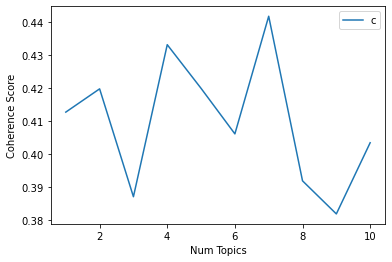

In [122]:
import matplotlib.pyplot as plt

plt.plot(range(1, num_topics+1), coherence_values)
plt.xlabel('Num Topics')
plt.ylabel('Coherence Score')
plt.legend(('coherence_values'), loc='best')
plt.show()

In [123]:
plt.savefig('test_plot.png', dpi=300, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

In [124]:
coherence_df = pd.DataFrame(list(zip([i+1 for i in range(num_topics)], coherence_values)),
                           columns=['num_df_topics', 'coherence_values'])
coherence_df

,num_df_topics,coherence_values
0,1,0.412703
1,2,0.419773
2,3,0.386992
3,4,0.433193
4,5,0.419928
5,6,0.406091
6,7,0.441840
7,8,0.391821
8,9,0.381766
9,10,0.403397


In [125]:
coherence_df.to_csv('Coherence_Values_Final.csv', index=False)

**E. BASE MODEL**

In [126]:
#LDA MODEL
model = LdaModel(corpus=corpus, num_topics=8, id2word=dictionary)

In [130]:
for index, topic in model.print_topics(-1):
  print('Topic {}:\nWord: {}\n'.format(index+1, topic))

Topic 1:
Word: 0.075*"mobil" + 0.030*"repeated" + 0.021*"om" + 0.018*"allcaps" + 0.018*"br" + 0.016*"batere" + 0.016*"gara" + 0.016*"number" + 0.014*"banget" + 0.014*"pakai"

Topic 2:
Word: 0.051*"mobil" + 0.050*"allcaps" + 0.040*"harga" + 0.029*"br" + 0.021*"lakban" + 0.020*"banjir" + 0.018*"number" + 0.017*"nya" + 0.015*"kaki" + 0.015*"pijak"

Topic 3:
Word: 0.047*"repeated" + 0.041*"elongated" + 0.021*"beli" + 0.011*"mobil" + 0.011*"number" + 0.011*"fitra" + 0.011*"beh" + 0.011*"gara" + 0.011*"matahari" + 0.011*"job"

Topic 4:
Word: 0.116*"br" + 0.066*"repeated" + 0.023*"harga" + 0.021*"om" + 0.021*"brp" + 0.021*"nya" + 0.017*"iya" + 0.016*"anti" + 0.016*"mobil" + 0.015*"air"

Topic 5:
Word: 0.035*"number" + 0.035*"listrik" + 0.035*"repeated" + 0.028*"br" + 0.028*"mobil" + 0.021*"nya" + 0.015*"banjir" + 0.015*"orang" + 0.015*"user" + 0.015*"rumah"

Topic 6:
Word: 0.051*"allcaps" + 0.050*"number" + 0.048*"br" + 0.025*"ioniq" + 0.025*"harga" + 0.021*"beli" + 0.015*"nya" + 0.013*"hyund

In [131]:
import pathlib
pathlib.Path().resolve()

WindowsPath('C:/Users/HP ELITEBOOK/UAS')

In [133]:
from gensim.test.utils import datapath

temp_file = datapath("C:/Users/HP ELITEBOOK/UAS/ldamodel")
model.save(temp_file)

In [135]:
temp_file = datapath("C:/Users/HP ELITEBOOK/UAS/ldamodel")
mymodel = LdaModel.load(temp_file)
mymodel.show_topics(num_topics=8)

[(0,
  '0.075*"mobil" + 0.030*"repeated" + 0.021*"om" + 0.018*"allcaps" + 0.018*"br" + 0.016*"batere" + 0.016*"gara" + 0.016*"number" + 0.014*"banget" + 0.014*"pakai"'),
 (1,
  '0.051*"mobil" + 0.050*"allcaps" + 0.040*"harga" + 0.029*"br" + 0.021*"lakban" + 0.020*"banjir" + 0.018*"number" + 0.017*"nya" + 0.015*"kaki" + 0.015*"pijak"'),
 (2,
  '0.047*"repeated" + 0.041*"elongated" + 0.021*"beli" + 0.011*"mobil" + 0.011*"number" + 0.011*"fitra" + 0.011*"beh" + 0.011*"gara" + 0.011*"matahari" + 0.011*"job"'),
 (3,
  '0.116*"br" + 0.066*"repeated" + 0.023*"harga" + 0.021*"om" + 0.021*"brp" + 0.021*"nya" + 0.017*"iya" + 0.016*"anti" + 0.016*"mobil" + 0.015*"air"'),
 (4,
  '0.035*"number" + 0.035*"listrik" + 0.035*"repeated" + 0.028*"br" + 0.028*"mobil" + 0.021*"nya" + 0.015*"banjir" + 0.015*"orang" + 0.015*"user" + 0.015*"rumah"'),
 (5,
  '0.051*"allcaps" + 0.050*"number" + 0.048*"br" + 0.025*"ioniq" + 0.025*"harga" + 0.021*"beli" + 0.015*"nya" + 0.013*"hyundai" + 0.009*"mobil" + 0.008*"coc

**EXTRACT DOMINANT TOPICS**

In [136]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data_tokens):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), 
                                                                  round(prop_topic,4), 
                                                                  topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [137]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=model, 
                                                  corpus=corpus, 
                                                  texts=data_tokens)

df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 
                             'Topic_Perc_Contrib', 'Keywords', 'Text']

C:\Users\HP ELITEBOOK\AppData\Local\Temp\ipykernel_19072\2218727134.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num),
C:\Users\HP ELITEBOOK\AppData\Local\Temp\ipykernel_19072\2218727134.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num),


In [138]:
df_dominant_topic[:100:]

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,3,0.5625,"br, repeated, harga, om, brp, nya, iya, anti, ...",[sebentar]
1,1,3,0.9327,"br, repeated, harga, om, brp, nya, iya, anti, ...","[bismillah, mudah, an, undi, poin, indosat, da..."
2,2,6,0.8250,"allcaps, repeated, br, pakai, mobil, pln, iya,...","[allcaps, tau, minecraft, allcaps]"
3,3,4,0.9271,"number, listrik, repeated, br, mobil, nya, ban...","[mas, mobil, listrik, ngecas, ngecas, rumah, s..."
4,4,7,0.9028,"nya, listrik, repeated, number, om, iya, mobil...","[iya, head, unit, stargazer, upgrade, head, un..."
...,...,...,...,...,...
95,95,6,0.8250,"allcaps, repeated, br, pakai, mobil, pln, iya,...","[gampang, pakai, drifting, hehehe]"
96,96,5,0.7812,"allcaps, number, br, ioniq, harga, beli, nya, ...","[beli, new, hrv]"
97,97,3,0.8249,"br, repeated, harga, om, brp, nya, iya, anti, ...","[pajak, nya, brp, om]"
98,98,2,0.8905,"repeated, elongated, beli, mobil, number, fitr...","[kesini, gara, kakak, beli, mobil, repeated, s..."


In [139]:
#SAVE THE df_dominant_topic
df_dominant_topic.to_csv('Dominant_Topic_Result.csv', index=False)

In [140]:
dom = pd.read_csv('Dominant_Topic_Result.csv')

In [141]:
dom

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,3,0.5625,"br, repeated, harga, om, brp, nya, iya, anti, ...",['sebentar']
1,1,3,0.9327,"br, repeated, harga, om, brp, nya, iya, anti, ...","['bismillah', 'mudah', 'an', 'undi', 'poin', '..."
2,2,6,0.8250,"allcaps, repeated, br, pakai, mobil, pln, iya,...","['allcaps', 'tau', 'minecraft', 'allcaps']"
3,3,4,0.9271,"number, listrik, repeated, br, mobil, nya, ban...","['mas', 'mobil', 'listrik', 'ngecas', 'ngecas'..."
4,4,7,0.9028,"nya, listrik, repeated, number, om, iya, mobil...","['iya', 'head', 'unit', 'stargazer', 'upgrade'..."
...,...,...,...,...,...
106,106,3,0.9027,"br, repeated, harga, om, brp, nya, iya, anti, ...","['kualitas', 'cat', 'nya', 'om', 'besok', 'lup..."
107,107,1,0.8905,"mobil, allcaps, harga, br, lakban, banjir, num...","['bang', 'mobil', 'cat', 'nya', 'kelupas', 'ke..."
108,108,3,0.8540,"br, repeated, harga, om, brp, nya, iya, anti, ...","['pakai', 'jawa', 'iya', 'om', 'fitra']"
109,109,3,0.8250,"br, repeated, harga, om, brp, nya, iya, anti, ...","['speed', 'likmiter', 'bahas', 'bang']"
